In [1]:
import json

# The DAG Module

The DAG module can be used to create and edit DAGs (Directed Acyclic Graphs) to reflect the causal relationships between attributes. In the following examples, we walkthrough different features of the DAG module. There will also be some tasks for you to gain familiarity working with the DAG.

In [2]:
from causalvis import DAG

### DAG quick start

The easiest way of getting started is to create an empty DAG canvas. Custom attributes can be added using the `ADD NODE` button on the left. Along the top menu are the options: `Select/Move`, `Edit Links`, `Search`, `Download Image`, and `Download JSON`.

Task: 

1) add **three attributes (nodes)** to the canvas, 

- Click `+ ADD NODE'
- Write Variable Name (any names you like)
- Click `ADD'
- Repeat above three times

2) **position** them, and 

- Click and move nodes

3) **connect** the nodes to express a causal relationship.

- Click the connect icon next to search box
- Click two nodes in a series to draw a directed edge between them
- Click an edge to remove it


Once you get familiar with the process, you can move on to the next task.

In [2]:
DAG()

DAG(component='DAG', props={'attributes': [], 'graph': None})

### DAG from attributes list

If the list of causal factors is known, the DAG can also be initialized by passing this list to the `attributes` prop.

Task: 1) Edit the cell below to initialize the module with **five attributes.**

In [10]:
dg = DAG(attributes=["A", "List", "of", "Variables", "."])
dg

DAG(component='DAG', props={'attributes': ['.', 'A', 'List', 'of', 'Variables'], 'graph': None})

### DAG from file

If a json nodelink file has already been created to capture the causal relationships between attributes, the contents of this file can be passed to the DAG module using the `graph` prop.

In [13]:
with open('../../public/DAG.json', 'r') as d:
    graph = json.load(d)

In [18]:
dg2 = DAG(graph=graph)
dg2

DAG(component='DAG', props={'attributes': None, 'graph': {'nodes': [{'x': 728.2895763246523, 'y': 83.853498218…

Once a graph has been created (such as in the cell above), treatment and outcome variables can be set using the context menu for each attribute in the list on the left. To pull up the context menu, `Shift - Right Click` on the attribute name.

Setting the treatment and outcome variables will prompt an automatic highlighting of other attributes in the DAG to reflect their relationship to the treatment and outcome. The color legend can be seen on the bottom right.

Task: 1) Set `absences` as the **treatment** variable, 2) Set `G1` as the **outcome** variable, 3) **save** the DAG as an png image (click the image icon on the top right corner).

### Obtaining Controls

The list of confounds, colliders, mediators, and prognostic variables can be accessed using the `Download JSON` button (top right). They can also be obtained by accessing the python variable such as `dg.confounds`.

Task: 1) Get the **confounds and prognostic variables** of the DAG above.
- `dg.mediators`
- `dg.confounds`
- `dg.prognostic`
- `dg.colliders`

In [24]:
dg2.confounds

[{'x': 772.9974349287219,
  'y': 83.8534982181423,
  'name': 'address',
  'id': 1654633751261,
  'children': {},
  'parents': {}},
 {'x': 630.5364416359243,
  'y': 196.9156004380896,
  'name': 'Pstatus',
  'id': 1654633751280,
  'children': {},
  'parents': {}},
 {'x': 940,
  'y': 420.62860531976867,
  'name': 'failures',
  'id': 1654633751260,
  'children': {},
  'parents': {}},
 {'x': 850.7105472179201,
  'y': 214.66998632429113,
  'name': 'paid',
  'id': 1654633751235,
  'children': {},
  'parents': {}},
 {'x': 835.6618795143202,
  'y': 361.4791805256952,
  'name': 'internet',
  'id': 1654633751275,
  'children': {},
  'parents': {}}]

### DAG from DataFrame

The DAG can also be initialized by passing in a pandas `DataFrame` using the `data` prop. In the following example, we load a dataset of student school performance. After dropping columns that contain sensitive demographic information, we pass the `DataFrame` to the DAG module.

This example is from [Causalnex](https://causalnex.readthedocs.io/en/latest/03_tutorial/01_first_tutorial.html).

In [25]:
import pandas as pd

data = pd.read_csv('../student-por.csv', delimiter=';')
data.head(5)

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]

In [26]:
drop_col = ['school','sex','age','Mjob', 'Fjob','reason','guardian']
data = data.drop(columns=drop_col)
data.head(5)

address famsize Pstatus  Medu  Fedu  traveltime  studytime  failures  \
0       U     GT3       A     4     4           2          2         0   
1       U     GT3       T     1     1           1          2         0   
2       U     LE3       T     1     1           1          2         0   
3       U     GT3       T     4     2           1          3         0   
4       U     GT3       T     3     3           1          2         0   

  schoolsup famsup  ... famrel freetime goout Dalc Walc health  absences  G1  \
0       yes     no  ...      4        3     4    1    1      3         4   0   
1        no    yes  ...      5        3     3    1    1      3         2   9   
2       yes     no  ...      4        3     2    2    3      3         6  12   
3        no    yes  ...      3        2     2    1    1      5         0  14   
4        no    yes  ...      4        3     2    1    2      5         0  11   

   G2  G3  
0  11  11  
1  11  11  
2  13  12  
3  14  14  
4  13  13  

[5 rows x 26 columns]

In [21]:
import numpy as np

struct_data = data.copy()
non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)

print(non_numeric_columns)

['address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in non_numeric_columns:
    struct_data[col] = le.fit_transform(struct_data[col])

struct_data.head(5)

address  famsize  Pstatus  Medu  Fedu  traveltime  studytime  failures  \
0        1        0        0     4     4           2          2         0   
1        1        0        1     1     1           1          2         0   
2        1        1        1     1     1           1          2         0   
3        1        0        1     4     2           1          3         0   
4        1        0        1     3     3           1          2         0   

   schoolsup  famsup  ...  famrel  freetime  goout  Dalc  Walc  health  \
0          1       0  ...       4         3      4     1     1       3   
1          0       1  ...       5         3      3     1     1       3   
2          1       0  ...       4         3      2     2     3       3   
3          0       1  ...       3         2      2     1     1       5   
4          0       1  ...       4         3      2     1     2       5   

   absences  G1  G2  G3  
0         4   0  11  11  
1         2   9  11  11  
2         6  12  13  12  
3         0  14  14  14  
4         0  11  13  13  

[5 rows x 26 columns]

In [23]:
DAG(data=struct_data)

DAG(component='DAG', props={'attributes': ['absences', 'activities', 'address', 'Dalc', 'failures', 'famrel', …

### DAG from NetworkX and Causalnex

Causal discovery packages such as [Causalnex](https://causalnex.readthedocs.io/en/latest/index.html) can also be used with the Causalvis DAG module. If you do not have Causalnex on your machine, you can skip the following example.

Note that the Causalnex package outputs a [NetworkX](https://networkx.org/documentation/stable/index.html) graph. The DAG module accepts graphs of this type using the `nx_graph` prop. The layout of the nodes will be automatically processed (Causalvis assumes no x and y coordinates are provided). Any NetworkX graph can be passed to this prop, and it is not limited to Causalnex outputs.

In [13]:
import warnings
from causalnex.structure import StructureModel

warnings.filterwarnings("ignore")  # silence warnings

sm = StructureModel()

In [14]:
from causalnex.structure.notears import from_pandas

sm = from_pandas(struct_data)

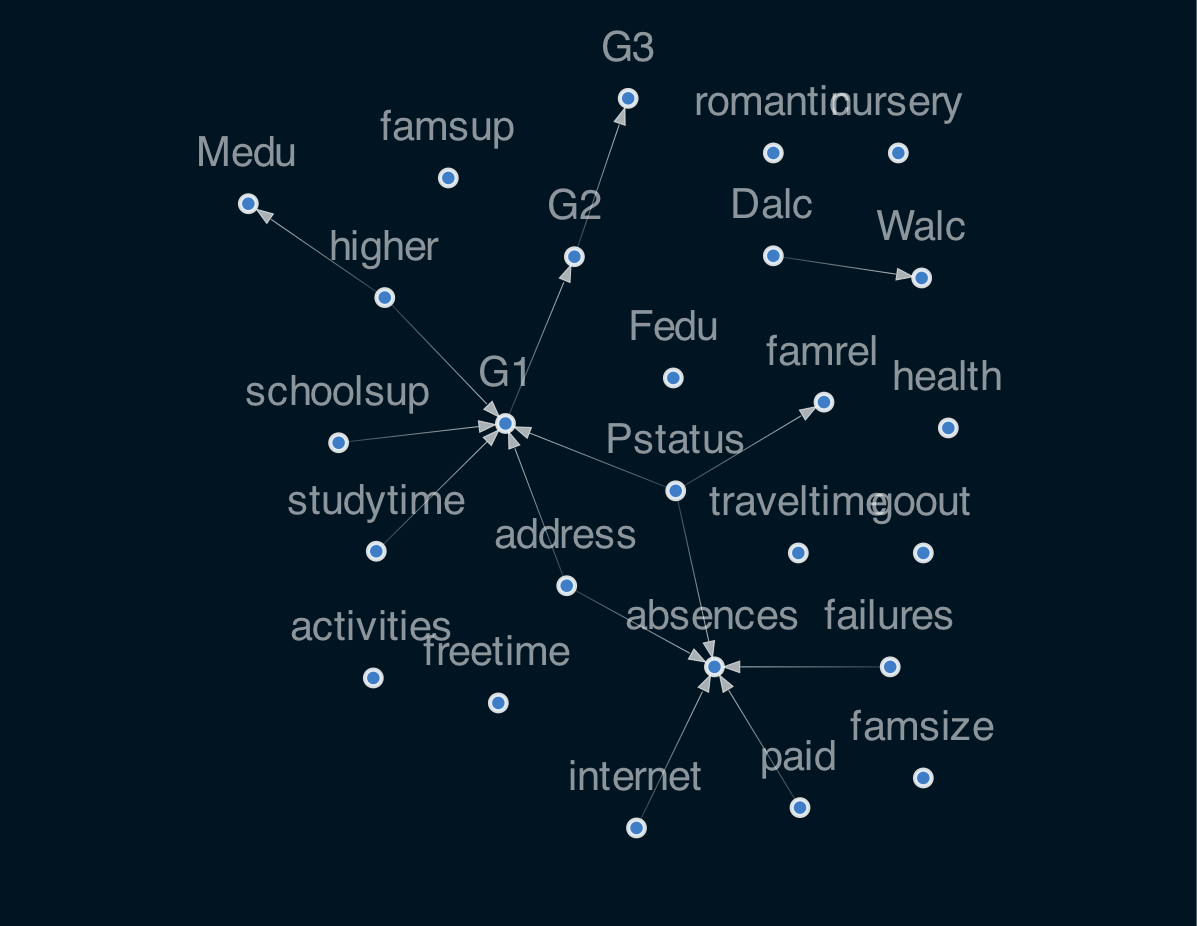

In [15]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

In [16]:
DAG(nx_graph=sm)

DAG(component='DAG', props={'attributes': None, 'graph': {'nodes': [{'x': -0.3948684560354587, 'y': 0.10818540…